In [40]:
import pandas as pd
import os
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [1]:
! pwd

/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis


## Load data

## Mouse

In [4]:
os.listdir('mouse/')

['mouse_corr_conditions.csv',
 'den_high_vs_low.csv',
 'mouse_ctnnb1_conditions_2.csv',
 'stam_mut_vs_none.csv',
 'stam_mut_S1_vs_S3.csv',
 'mouse_ctnnb1_conditions.csv']

In [7]:
stam_out1 = pd.read_csv('mouse/stam_mut_vs_none.csv',index_col=0)

In [27]:
stam_out1[stam_out1.padj <= 0.05].shape

(319, 6)

In [192]:
stam_out_pc = pd.read_csv('mouse/stam_PC1_vs_PC2.csv',index_col=0)

In [193]:
stam_out_pc[stam_out_pc.padj <= 0.05].shape

(1292, 6)

In [305]:
stam_out2 = pd.read_csv('mouse/stam_mut_S1_vs_S3.csv',index_col=0)

In [306]:
stam_out2[stam_out2.padj <= 0.05].shape

(1286, 6)

In [24]:
#print '\n'.join(stam_out2[stam_out2.padj <= 0.05].index)

In [203]:
x = set(stam_out1[stam_out1.padj <= 0.05].index)
y = set(stam_out2[stam_out2.padj <= 0.05].index)

In [200]:
from matplotlib_venn import venn2, venn3

<matplotlib_venn._common.VennDiagram instance at 0x7fe406b013b0>

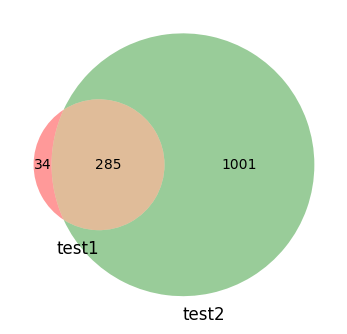

In [32]:
venn2((x,y),('test1','test2'))

In [204]:
z = set(stam_out_pc[stam_out_pc.padj <= 0.05].index)

<matplotlib_venn._common.VennDiagram instance at 0x7fe403ce55a8>

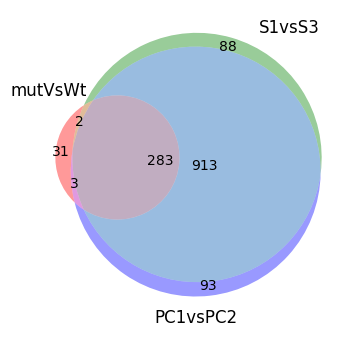

In [205]:
venn3((x,y,z),('mutVsWt','S1vsS3','PC1vsPC2'))

In [16]:
den_out = pd.read_csv('mouse/den_high_vs_low.csv',index_col=0)

In [264]:
den_out2 = pd.read_csv('mouse/den_high_vs_low_sub.csv',index_col=0)

In [265]:
den_out[den_out.padj <= 0.05].shape

(156, 8)

In [266]:
den_out2[den_out2.padj <= 0.05].shape

(502, 6)

In [352]:
tak1_out = pd.read_csv('mouse/tak1_high_vs_low_sub.csv',index_col=0)

In [25]:
#print '\n'.join(den_out[den_out.padj <= 0.05].index)

## Generate GSEA_prerank files

In [33]:
# https://software.broadinstitute.org/cancer/software/gsea/wiki/index.php/FAQ#Can_I_use_GSEA_to_analyze_SNP.2C_SAGE.2C_ChIP-Seq_or_RNA-Seq_data.3F
# col1:Genes col2: base 2 log FC


In [83]:
def get_rank_out(df,out_fname):
    df['Gene'] = df.index
    df_rank = df[['Gene','log2FoldChange']]
    df_rank.to_csv(out_fname,sep='\t',index=False,header=None)

In [175]:
den_rank = get_rank_out(den_out,'den_rank.rnk')

In [267]:
den_rank2 = get_rank_out(den_out2,'den_rank_sub.rnk')

In [359]:
tak1_rank = get_rank_out(tak1_out,'tak1_rank.rnk')

In [360]:
! pwd

/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis


## STAM

In [194]:
stam_out_pc_rank = get_rank_out(stam_out_pc,'stam_PC1vsPC2_rank.rnk')

In [302]:
stam_out1_rank = get_rank_out(stam_out1,'stam_mut_vs_no_rank.rnk')
stam_out2_rank = get_rank_out(stam_out2,'stam_S1_vs_S3_rank.rnk')

## Take out the proliferation genes

In [270]:
prolif_genes = pd.read_csv('~/Projects/HCC/RNA_analysis/prolif_genes.txt',header=None)
prolif_genes.columns = ['Genes']

In [271]:
prolif_genes.head()

,Genes
0,MYBL2
1,MAD2L1
2,FOXM1
3,CDC2
4,CDC20


<matplotlib_venn._common.VennDiagram instance at 0x7fe4016c0c68>

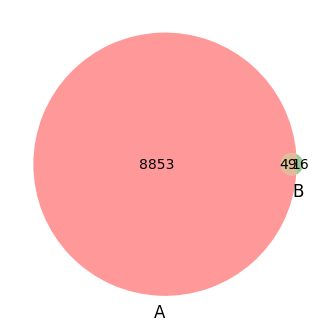

In [273]:
t1 = set(den_out.Gene.tolist())
t2 = set(prolif_genes.Genes.tolist())
venn2((t1,t2))

In [275]:
allFname = pd.Series(os.listdir('.'))

rankFname = allFname[allFname.str.contains('rnk')]

In [292]:
for r in rankFname.tolist():
    tmp = pd.read_csv(r,header=None,sep='\t')
    tmp.columns = ['Gene','log2FC']

    tmp_noProl = tmp[~tmp.Gene.isin(prolif_genes.Genes)]#.shape

    print tmp_noProl.shape

    new_fname = r.split('.')[0] + '_noPrlf.rnk'

    tmp_noProl.to_csv(new_fname,sep='\t',index=False,header=None)

(8853, 2)
(8853, 2)
(8853, 2)
(8852, 2)
(8853, 2)


In [293]:
! ls -lht |head

total 4.5M
-rw-r--r-- 1 mdow users 190K Mar  7 09:46 stam_mut_vs_no_rank_noPrlf.rnk
-rw-r--r-- 1 mdow users 191K Mar  7 09:46 den_rank_sub_noPrlf.rnk
-rw-r--r-- 1 mdow users 190K Mar  7 09:46 stam_PC1vsPC2_rank_noPrlf.rnk
-rw-r--r-- 1 mdow users 189K Mar  7 09:46 stam_S1_vs_S3_rank_noPrlf.rnk
-rw-r--r-- 1 mdow users 192K Mar  7 09:46 den_rank_noPrlf.rnk
-rw-r--r-- 1 mdow users 675K Mar  7 09:44 check_deseq_results_get_GSEA_input.ipynb
-rw-r--r-- 1 mdow users 192K Mar  6 11:10 den_rank_sub.rnk
-rw-r--r-- 1 mdow users 979K Mar  6 11:10 run_DESeq2.ipynb
drwxr-xr-x 2 mdow users   10 Mar  6 11:08 mouse


## Volcano plot

In [298]:
def test(df,title,p):
    plt.subplots(figsize=(5,5))
    x = df.log2FoldChange
    y = -np.log10(df.pvalue)
    plt.scatter(x,y,color='black')
    dash_y = -np.log10(0.05)
    plt.plot([min(x)-0.5,max(x)+0.5],[dash_y,dash_y],linestyle='--',color='r')
    
    # Change the x-axis to FC instead of log2
    m1 = df.padj <= p
    m2 = df.log2FoldChange >= 1
    m3 = df.log2FoldChange <= -1
    
    sig_df = df[m1&(m2|m3)]
    x2 = sig_df.log2FoldChange
    y2 = -np.log10(sig_df.pvalue) 
    plt.scatter(x2, y2, color='r')
    
    # Add lines for threshold
    plt.plot([np.log2(1/1.5),np.log2(1/1.5)],[min(y),max(y)],linestyle='--',color='b')
    plt.plot([np.log2(1.5),np.log2(1.5)],[min(y),max(y)],linestyle='--',color='b')
    
    plt.plot([np.log2(2),np.log2(2)],[min(y),max(y)],linestyle='--',color='r')
    plt.plot([-np.log2(2),-np.log2(2)],[min(y),max(y)],linestyle='--',color='r')
    
    #plt.plot([1/1.5,1/1.5],[min(y),max(y)],linestyle='--',color='b')
    #plt.plot([1.5,1.5],[min(y),max(y)],linestyle='--',color='b')
    
    #plt.plot([2,2],[min(y),max(y)],linestyle='--',color='r')
    #plt.plot([-2,-2],[min(y),max(y)],linestyle='--',color='r')
    
    
    plt.xlabel('log2 FoldChange')
    plt.ylabel('-log10(p-value)')
    plt.title(title)

In [249]:
def plot_volcano(df,title,p):
    plt.subplots(figsize=(5,5))
    x = df.log2FoldChange
    y = -np.log10(df.padj)
    plt.scatter(x,y,color='black')
    dash_y = -np.log10(0.05)
    plt.plot([min(x)-0.5,max(x)+0.5],[dash_y,dash_y],linestyle='--',color='r')
    
    # Change the x-axis to FC instead of log2
    m1 = df.padj <= p
    m2 = df.log2FoldChange >= 1
    m3 = df.log2FoldChange <= -1
    
    sig_df = df[m1&(m2|m3)]
    x2 = sig_df.log2FoldChange
    y2 = -np.log10(sig_df.padj) 
    plt.scatter(x2, y2, color='r')
    
    # Add lines for threshold
    plt.plot([np.log2(1/1.5),np.log2(1/1.5)],[min(y),max(y)],linestyle='--',color='b')
    plt.plot([np.log2(1.5),np.log2(1.5)],[min(y),max(y)],linestyle='--',color='b')
    
    plt.plot([np.log2(2),np.log2(2)],[min(y),max(y)],linestyle='--',color='r')
    plt.plot([-np.log2(2),-np.log2(2)],[min(y),max(y)],linestyle='--',color='r')
    
    #plt.plot([1/1.5,1/1.5],[min(y),max(y)],linestyle='--',color='b')
    #plt.plot([1.5,1.5],[min(y),max(y)],linestyle='--',color='b')
    
    #plt.plot([2,2],[min(y),max(y)],linestyle='--',color='r')
    #plt.plot([-2,-2],[min(y),max(y)],linestyle='--',color='r')
    
    
    plt.xlabel('log2 FoldChange')
    plt.ylabel('-log10(adjusted p-value)')
    plt.title(title)

In [250]:
def plot_volcano_FC(df,title,p):
    df['FC'] = [2**i for i in df.log2FoldChange]
    
    plt.subplots(figsize=(5,5))
    x = df.FC
    y = -np.log10(df.padj)
    plt.scatter(x,y,color='black')
    dash_y = -np.log10(0.05)
    plt.plot([min(x)-0.5,max(x)+0.5],[dash_y,dash_y],linestyle='--',color='r')
    
    # Change the x-axis to FC instead of log2
    m1 = df.padj <= p
    m2 = df.FC >= 4
    m3 = df.FC <= 0.25
    
    sig_df = df[m1&(m2|m3)]
    x2 = sig_df.FC
    y2 = -np.log10(sig_df.padj) 
    plt.scatter(x2, y2, color='r')
    
    # Add lines for threshold
    
    plt.plot([1/1.5,1/1.5],[min(y),max(y)],linestyle='--',color='b')
    plt.plot([1.5,1.5],[min(y),max(y)],linestyle='--',color='b')
    
    plt.plot([2,2],[min(y),max(y)],linestyle='--',color='r')
    plt.plot([1/2,1/2],[min(y),max(y)],linestyle='--',color='r')
    
    
    plt.xlabel('FoldChange')
    plt.ylabel('-log10(adjusted p-value)')
    plt.title(title)

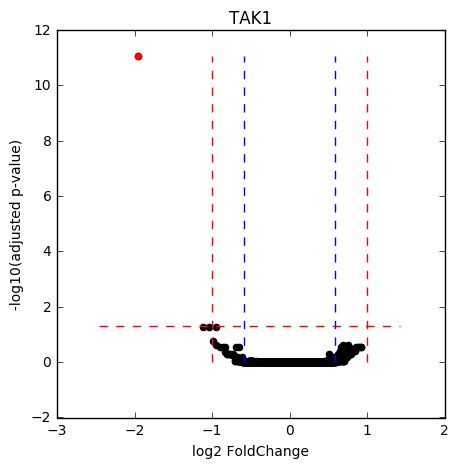

In [357]:
plot_volcano(tak1_out[~tak1_out.padj.isnull()],'TAK1',0.05)

In [362]:
tak1_out[tak1_out.padj <= 0.06]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene
DNAJC12,111.602111,-0.946265,0.223563,-4.232648,2.309562e-05,5.571612e-02,DNAJC12
HSPA1B,254.345900,-1.952950,0.243089,-8.033893,9.442740e-16,8.350215e-12,HSPA1B
JCHAIN,417.508831,-1.043043,0.247578,-4.212980,2.520236e-05,5.571612e-02,JCHAIN
PAGR1,66.008033,-1.110680,0.255673,-4.344138,1.398234e-05,5.571612e-02,PAGR1


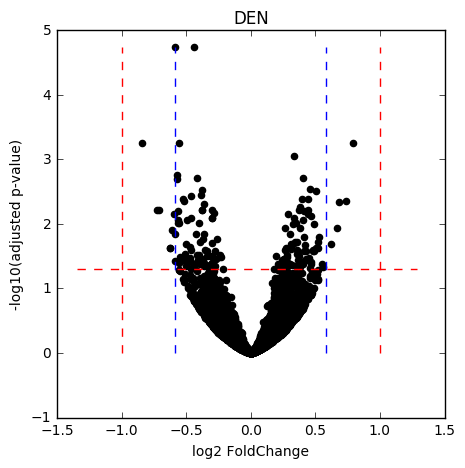

In [252]:
plot_volcano(den_out,'DEN',0.05)

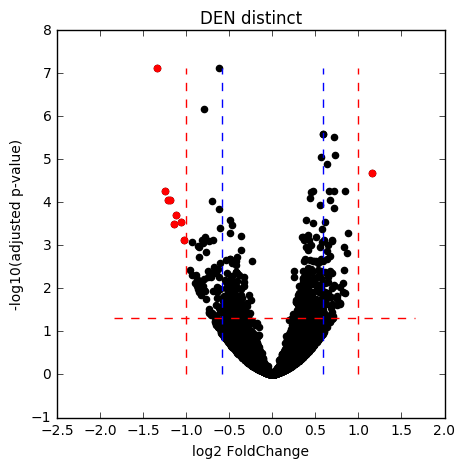

In [297]:
plot_volcano(den_out2,'DEN distinct',0.05)

In [346]:
def plot_volcano_label(df,title,p):
    plt.subplots(figsize=(8,8))
    x = df.log2FoldChange
    y = -np.log10(df.padj)
    plt.scatter(x,y,color='black')
    dash_y = -np.log10(0.05)
    plt.plot([min(x)-0.5,max(x)+0.5],[dash_y,dash_y],linestyle='--',color='r')
    
    # Change the x-axis to FC instead of log2
    m1 = df.padj <= p
    m2 = df.log2FoldChange >= 1
    m3 = df.log2FoldChange <= -1
    
    sig_df = df[m1&(m2|m3)]
    x2 = sig_df.log2FoldChange
    y2 = -np.log10(sig_df.padj) 
    plt.scatter(x2, y2, color='r')
    
    # Add lines for threshold
    plt.plot([np.log2(1/1.5),np.log2(1/1.5)],[min(y),max(y)],linestyle='--',color='b')
    plt.plot([np.log2(1.5),np.log2(1.5)],[min(y),max(y)],linestyle='--',color='b')
    
    plt.plot([np.log2(2),np.log2(2)],[min(y),max(y)],linestyle='--',color='r')
    plt.plot([-np.log2(2),-np.log2(2)],[min(y),max(y)],linestyle='--',color='r')
    
    #plt.plot([1/1.5,1/1.5],[min(y),max(y)],linestyle='--',color='b')
    #plt.plot([1.5,1.5],[min(y),max(y)],linestyle='--',color='b')
    
    #plt.plot([2,2],[min(y),max(y)],linestyle='--',color='r')
    #plt.plot([-2,-2],[min(y),max(y)],linestyle='--',color='r')
    
    
    plt.xlabel('log2 FoldChange')
    plt.ylabel('-log10(adjusted p-value)')
    plt.title(title)


    m1 = df.log2FoldChange < -1.0
    m2 = df.log2FoldChange > 1.0
    df_points = df[(m1|m2)]
    for label, x, y in zip(df_points.Gene.tolist(), df_points.log2FoldChange.tolist(),df_points.padj.tolist()):
        plt.annotate(
            label,
            xy=(x, -np.log10(y)), xytext=(-1, 1),
            textcoords='offset points', ha='right', va='bottom')

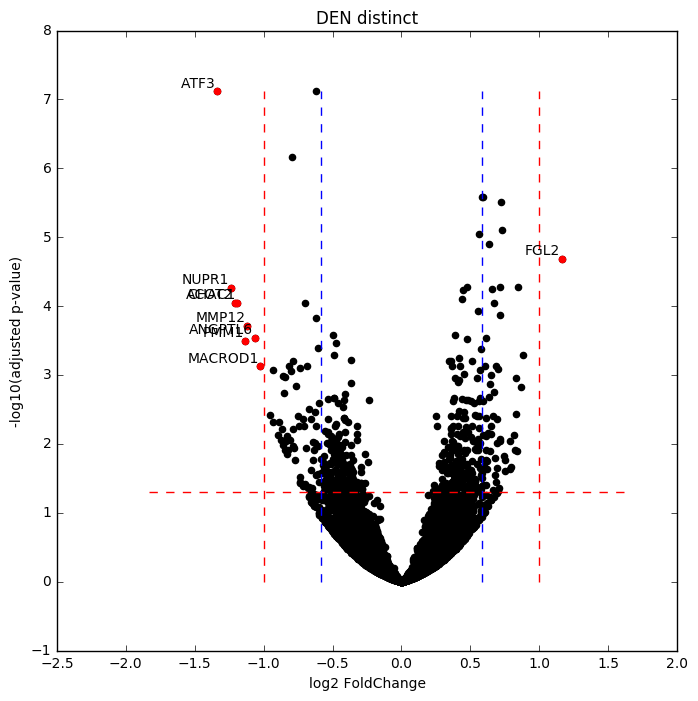

In [347]:
plot_volcano_label(den_out2,'DEN distinct',0.05)


In [349]:
den_points.sort_values(['padj'])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene
ATF3,443.373256,-1.335269,0.197096,-6.774716,1.246506e-11,7.673312e-08,ATF3
FGL2,985.009482,1.162963,0.208176,5.586456,2.317509e-08,2.059106e-05,FGL2
NUPR1,514.234963,-1.240063,0.231536,-5.355804,8.517680e-08,5.405685e-05,NUPR1
ACOT2,189.374564,-1.207458,0.231479,-5.216277,1.825550e-07,9.011116e-05,ACOT2
CHAC1,103.199020,-1.190753,0.229167,-5.195995,2.036272e-07,9.046141e-05,CHAC1
MMP12,507.513353,-1.122480,0.224120,-5.008386,5.488824e-07,1.950728e-04,MMP12
ANGPTL6,109.383193,-1.063878,0.216747,-4.908399,9.182311e-07,2.893180e-04,ANGPTL6
PMM1,93.797333,-1.137128,0.233613,-4.867580,1.129731e-06,3.237956e-04,PMM1
MACROD1,85.132268,-1.026824,0.222417,-4.616668,3.899507e-06,7.531348e-04,MACROD1


In [350]:
m1 = den_out2.padj < 0.05
m2 = den_out2.padj < 0.05
den_out2[]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene
A1CF,2799.213798,0.318554,0.140986,2.259467,2.385437e-02,0.159598,A1CF
AAAS,444.989350,0.407120,0.196592,2.070890,3.836912e-02,0.207619,AAAS
AACS,2075.148846,-0.098584,0.232239,-0.424494,6.712058e-01,0.858699,AACS
AADAC,6398.657762,0.407223,0.120715,3.373414,7.424233e-04,0.022390,AADAC
AADAT,534.120997,0.125374,0.212220,0.590774,5.546717e-01,0.791943,AADAT
AAED1,590.428016,-0.010814,0.170453,-0.063440,9.494164e-01,0.980082,AAED1
AAGAB,471.274031,-0.010569,0.100012,-0.105681,9.158355e-01,0.968887,AAGAB
AAK1,151.330565,0.179317,0.173754,1.032019,3.020633e-01,0.599873,AAK1
AAMDC,186.457071,-0.279217,0.160845,-1.735936,8.257523e-02,0.312757,AAMDC
AAMP,2785.597148,-0.182615,0.119474,-1.528493,1.263901e-01,0.390240,AAMP


In [300]:
den_out2[den_out2.padj <= 0.05].shape

(502, 7)

In [301]:
den_out[den_out.padj <= 0.05].shape

(156, 8)

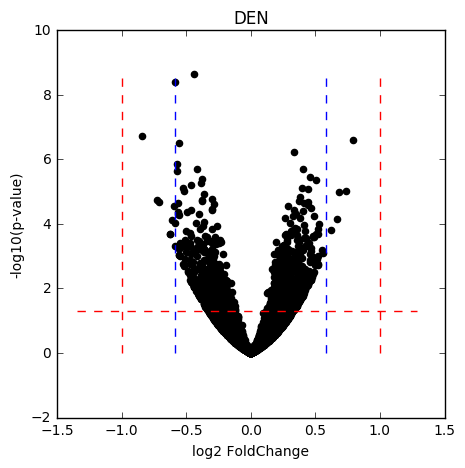

In [299]:
test(den_out,'DEN',0.05)

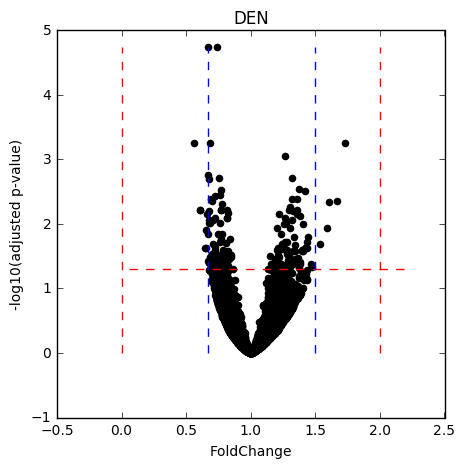

In [254]:
plot_volcano_FC(den_out,'DEN',0.05)

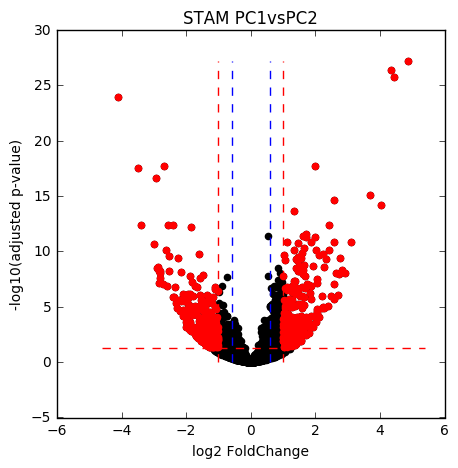

In [255]:
plot_volcano(stam_out_pc,'STAM PC1vsPC2',0.05)

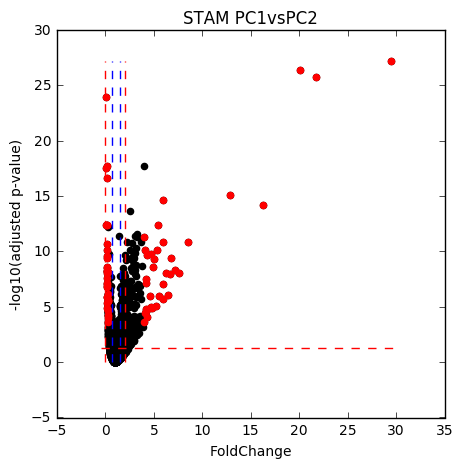

In [256]:
plot_volcano_FC(stam_out_pc,'STAM PC1vsPC2',0.05)

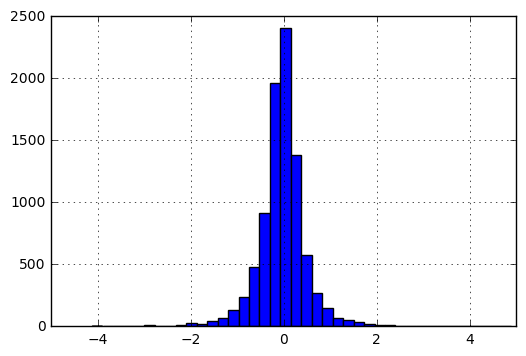

In [257]:
stam_out_pc.log2FoldChange.hist(bins=40)

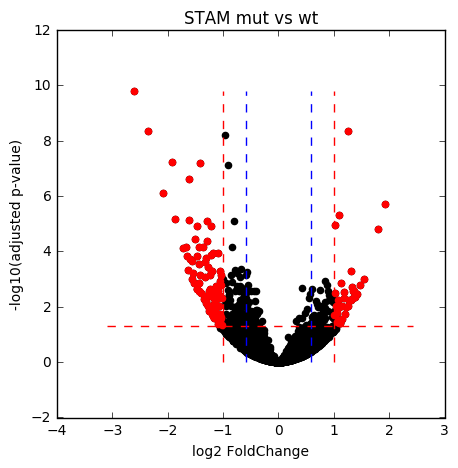

In [258]:
plot_volcano(stam_out1,'STAM mut vs wt',0.05)

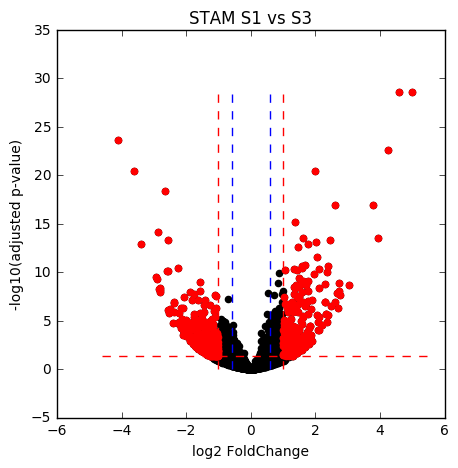

In [307]:
plot_volcano(stam_out2,'STAM S1 vs S3',0.05)

## Human

In [8]:
allfnames = pd.Series(os.listdir('.'))

myFnames = allfnames[allfnames.str.contains('^group')].tolist()

tmp = pd.read_csv(myFnames[0],index_col=0)

In [23]:
myFnames[0].split('.')[0]

'group1_vs_3'

In [65]:
for f in myFnames:
    tmp = pd.read_csv(f,index_col=0)
    groups = f.split('.')[0]
    tmp['Groups'] = groups
    if myFnames.index(f) == 0:
        combo = tmp
    else:
        combo = pd.concat([combo,tmp])

In [66]:
combo.shape

(25584, 7)

In [67]:
combo.Groups.value_counts()

group1_vs_3    8528
group1_vs_2    8528
group2_vs_3    8528
Name: Groups, dtype: int64

In [68]:
combo['Gene'] = [g.upper() for g in combo.index]

In [69]:
combo.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Groups,Gene
a1cf,2888.275685,0.297718,0.110662,2.690337,7.137996e-03,1.552878e-02,group1_vs_3,A1CF
aaas,1775.394211,-0.045714,0.048685,-0.938979,3.477416e-01,4.312119e-01,group1_vs_3,AAAS
aacs,983.399582,-0.310579,0.080497,-3.858286,1.141850e-04,3.997414e-04,group1_vs_3,AACS
aadac,12321.743812,0.584359,0.146922,3.977338,6.969113e-05,2.576185e-04,group1_vs_3,AADAC
aadat,293.701766,0.998724,0.127864,7.810824,5.681547e-15,1.552956e-13,group1_vs_3,AADAT


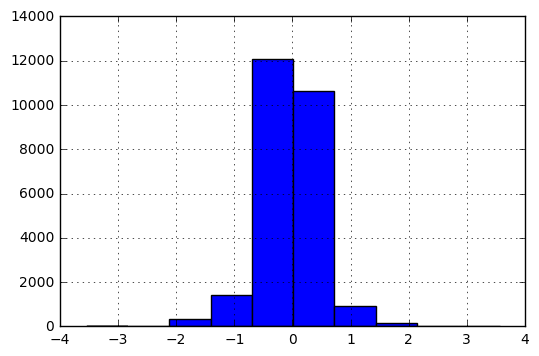

In [70]:
combo.log2FoldChange.hist()

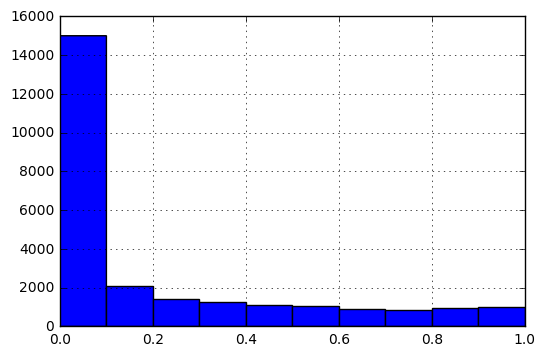

In [71]:
combo.padj.hist()

In [259]:
m1 = combo.padj <0.01

fc_thres = 1.5

m2 = combo.log2FoldChange > fc_thres
m3 = combo.log2FoldChange < -fc_thres
print combo[m1&(m2|m3)].Groups.value_counts()

tmp = combo[m1&(m2|m3)]

m4 = combo.Groups == 'group1_vs_2'
x = set(combo[m1&(m2|m3)&m4].Gene)
m5 = combo.Groups == 'group1_vs_3'
y = set(combo[m1&(m2|m3)&m5].Gene)
m6 = combo.Groups == 'group2_vs_3'
z = set(combo[m1&(m2|m3)&m6].Gene)

group1_vs_2    233
group2_vs_3    164
group1_vs_3     40
Name: Groups, dtype: int64


<matplotlib_venn._common.VennDiagram instance at 0x7fc7676864d0>

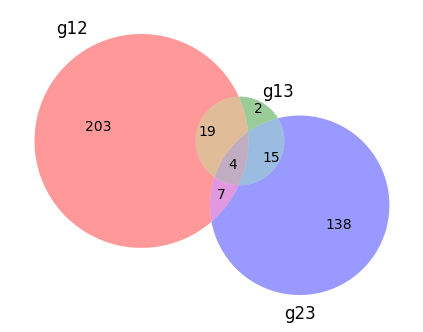

In [102]:
from matplotlib_venn import venn3
venn3((x,y,z),('g12','g13','g23'))

## Create a table of gene and significance

In [108]:
combo[combo.Gene == 'TP53']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Groups,Gene
tp53,1713.158536,-0.247573,0.095129,-2.602496,0.009255,0.019502,group1_vs_3,TP53
tp53,1489.453077,-0.510047,0.135569,-3.762265,0.000168,0.000520,group1_vs_2,TP53
tp53,1104.887555,0.010557,0.133636,0.078999,0.937033,0.962241,group2_vs_3,TP53


In [109]:
combo_uS = combo.pivot(index='Gene',columns='Groups',values='padj')

In [114]:
combo_uS.head()

Groups,group1_vs_2,group1_vs_3,group2_vs_3
Gene,,,
A1CF,8.656482e-02,1.552878e-02,0.027975
AAAS,1.017479e-02,4.312119e-01,0.224228
AACS,6.971956e-07,3.997414e-04,0.790752
AADAC,3.361327e-05,2.576185e-04,0.246592
AADAT,2.212703e-18,1.552956e-13,0.697526


## These differentially expressed genes should be more similar in mice?

In [139]:
# already logged 
mouse = pd.read_csv('corr_exp_mouse.csv',skiprows=1,index_col=0)
mouse = mouse.iloc[1:,:]

human = pd.read_csv('corr_exp_human.csv',index_col=0)

myClust = pd.read_csv('human_mouseClust.csv')
pidToClust_dict = myClust.set_index(['PID'])['myClust'].to_dict()
#human_raw = read.csv('tcga_lihc_rawcounts.csv',row.names=1,check.names=FALSE)

# get mouse model info
mouse_info = pd.read_csv('corr_exp_mouse.csv',index_col=0,header=None).iloc[0:2,:].T

mouseToModel_dict = mouse_info.set_index(['sample'])['strain'].to_dict()

In [164]:
from scipy.spatial.distance import cdist
def corr(df1,df2):
    myM=cdist(df1.T,df2.T,'correlation')
    return 1-pd.DataFrame(data=myM,index=df1.columns,columns=df2.columns)

def get_z(inZDf):
    tmp = stats.zscore(inZDf)
    outZDf = pd.DataFrame(tmp)
    outZDf.columns = inZDf.columns
    outZDf.index = inZDf.index
    return outZDf

In [148]:
human.shape, mouse.shape

((9175, 183), (9175, 56))

### Correlation with all (original)

In [162]:
corrDf_all =corr(df1=human,df2=mouse)


In [234]:
def plot_box_corr(corr_df,plot_title,g_size):
    corr_df_z = get_z(corr_df.T)
    corr_df_z_S = corr_df_z.stack().reset_index()
    corr_df_z_S.columns = ['Mouse','Human','Corr_z']

    corr_df_z_S['Human_clust'] = corr_df_z_S.Human.map(pidToClust_dict)
    corr_df_z_S['Mouse_model'] = corr_df_z_S.Mouse.map(mouseToModel_dict)
    ax = sns.boxplot(data=corr_df_z_S, x='Human_clust',y='Corr_z',hue='Mouse_model')
    plot_title_2 = plot_title+', gene N='+str(g_size)
    ax.set_title(plot_title_2)
    ax.set_xticklabels([1,2,3])
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

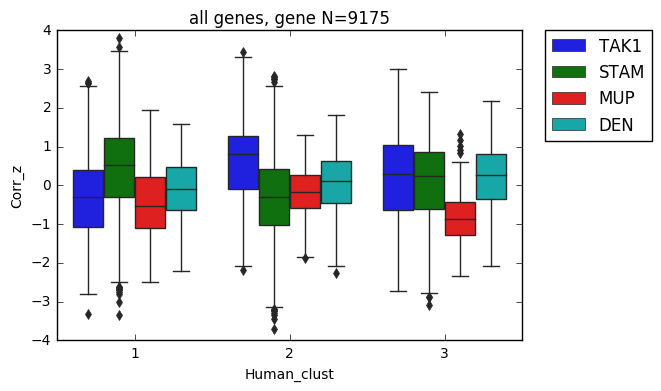

In [235]:
plot_box_corr(corrDf_all,'all genes',9175)

## With just DEGs

In [205]:
g12 = [g.lower() for g in list(x)]
g13 = [g.lower() for g in list(y)]
g23 = [g.lower() for g in list(z)]

In [ ]:
# Group 1: high STAM correlation, some DEN
# Group 2: high TAK1 correlation, some DEN
# Group 3: high TAK1 correlation, some STAM and some DEN

In [211]:
corrDf_g12 =corr(df1=human.loc[g12,:],df2=mouse.loc[g12,:])
corrDf_g13 =corr(df1=human.loc[g13,:],df2=mouse.loc[g13,:])
corrDf_g23 =corr(df1=human.loc[g23,:],df2=mouse.loc[g23,:])

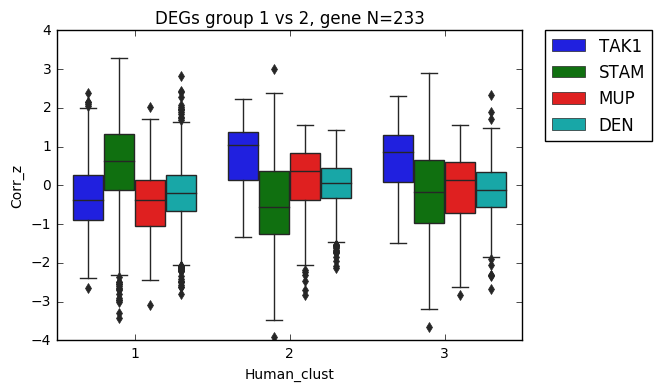

In [236]:
plot_box_corr(corrDf_g12,'DEGs group 1 vs 2',len(g12)) # expected highest STAM in clust1 and highest with TAK1 in 2

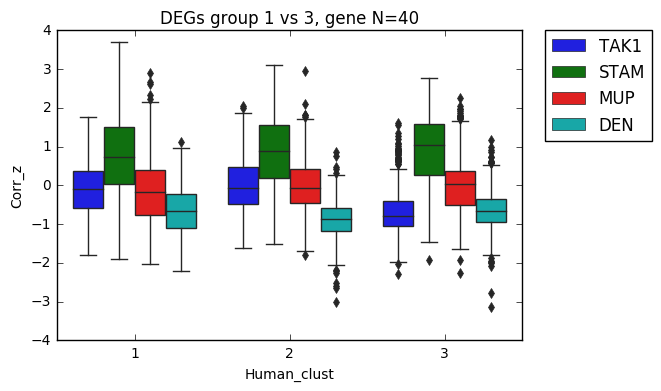

In [237]:
plot_box_corr(corrDf_g13,'DEGs group 1 vs 3',len(g13))

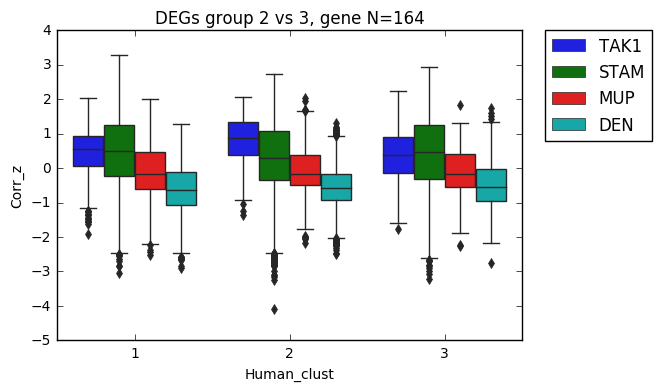

In [238]:
plot_box_corr(corrDf_g23,'DEGs group 2 vs 3',len(g23)) # expected highest STAM in clust1 and highest with TAK1 in 2

## 1 vs all

In [250]:
allfnames = pd.Series(os.listdir('.'))

vsAll_fnames = allfnames[allfnames.str.contains('and')].tolist()


In [251]:
vsAll_fnames

['group2_vs_1and3.csv', 'group3_vs_1and2.csv', 'group1_vs_2and3.csv']

In [254]:
for f in vsAll_fnames:
    tmp = pd.read_csv(f,index_col=0)
    groups = f.split('.')[0]
    tmp['Groups'] = groups
    if vsAll_fnames.index(f) == 0:
        combo_2 = tmp
    else:
        combo_2 = pd.concat([combo_2,tmp])

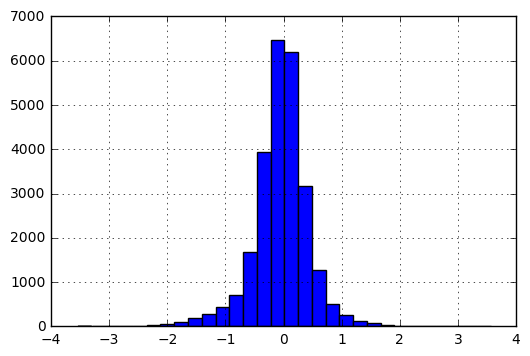

In [275]:
combo.log2FoldChange.hist(bins=30)

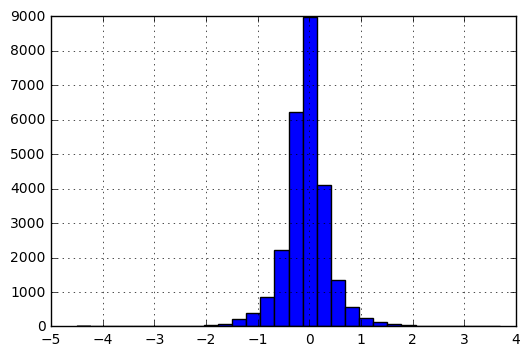

In [258]:
combo_2.log2FoldChange.hist(bins=30)

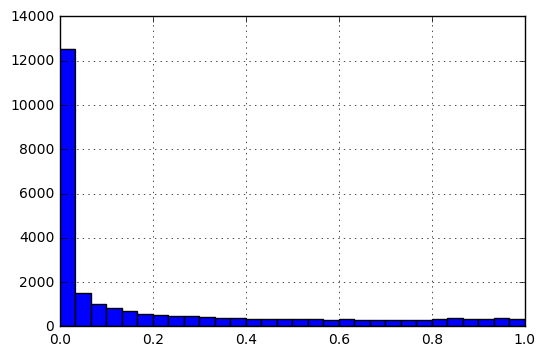

In [260]:
combo_2.padj.hist(bins=30)

In [261]:
combo_2.Groups.unique()

array(['group2_vs_1and3', 'group3_vs_1and2', 'group1_vs_2and3'], dtype=object)

In [263]:
combo_2.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Groups
A1CF,2766.126128,0.114977,0.138990,0.827231,0.408106,0.514994,group2_vs_1and3
AAAS,1573.795881,-0.183968,0.066165,-2.780457,0.005428,0.014336,group2_vs_1and3
AACS,805.305277,-0.528751,0.121624,-4.347429,0.000014,0.000082,group2_vs_1and3
AADAC,13298.383508,0.454741,0.183997,2.471458,0.013456,0.031141,group2_vs_1and3
AADAT,378.474807,0.863117,0.191896,4.497841,0.000007,0.000044,group2_vs_1and3


In [264]:
combo_2['Gene'] = combo_2.index

In [302]:
m1 = combo_2.padj <0.01

fc_thres = 1.2

m2 = combo_2.log2FoldChange > fc_thres
m3 = combo_2.log2FoldChange < -fc_thres
print combo_2[m1&(m2|m3)].Groups.value_counts()

#tmp = combo_2[m1&(m2|m3)]

m4 = combo_2.Groups == 'group1_vs_2and3'
x2 = set(combo_2[m1&(m2|m3)&m4].Gene)
m5 = combo_2.Groups == 'group2_vs_1and3'
y2 = set(combo_2[m1&(m2|m3)&m5].Gene)
m6 = combo_2.Groups == 'group3_vs_1and2'
z2 = set(combo_2[m1&(m2|m3)&m6].Gene)

group1_vs_2and3    494
group2_vs_1and3    117
group3_vs_1and2     54
Name: Groups, dtype: int64


<matplotlib_venn._common.VennDiagram instance at 0x7fc72c59c248>

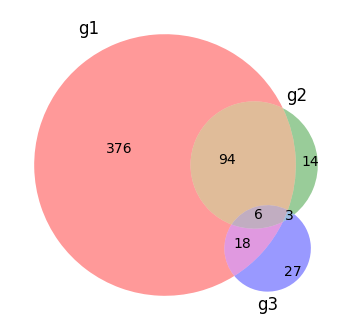

In [298]:
from matplotlib_venn import venn3
venn3((x2,y2,z2),('g1','g2','g3'))

## Compare pairwise with 1vsAll?

<matplotlib_venn._common.VennDiagram instance at 0x7fc72c610170>

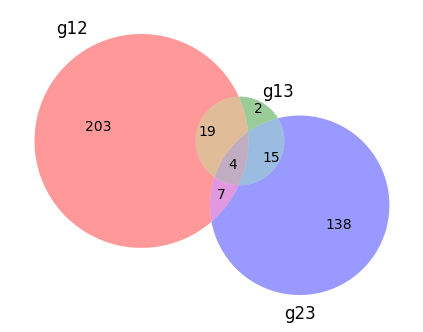

In [290]:
from matplotlib_venn import venn3
venn3((x,y,z),('g12','g13','g23'))

<matplotlib_venn._common.VennDiagram instance at 0x7fc72c17c4d0>

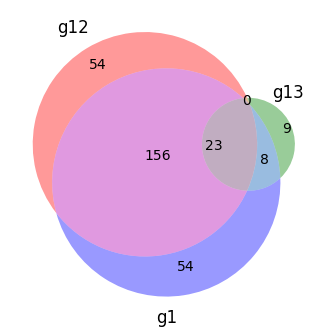

In [291]:
venn3((x,y,x2),('g12','g13','g1')) #abs(FC) > 1.5
# DEGs between group1 vs group2+3 is mostly from group 1 vs group2? 

In [303]:
g1 = [g.lower() for g in list(x2)]
g2 = [g.lower() for g in list(y2)]
g3 = [g.lower() for g in list(z2)]

In [305]:
corrDf_g1 =corr(df1=human.loc[g1,:],df2=mouse.loc[g1,:])
corrDf_g2 =corr(df1=human.loc[g2,:],df2=mouse.loc[g2,:])
corrDf_g3 =corr(df1=human.loc[g3,:],df2=mouse.loc[g3,:])

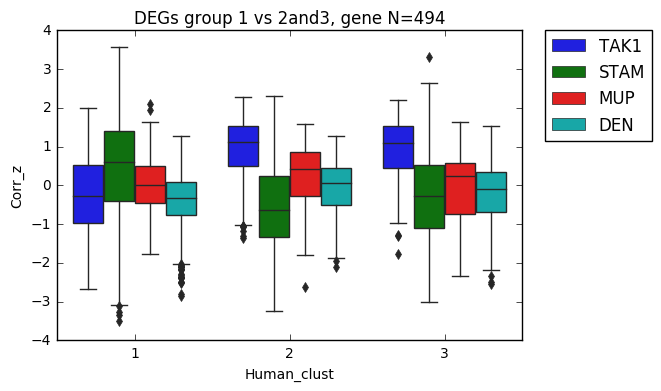

In [306]:
plot_box_corr(corrDf_g1,'DEGs group 1 vs 2and3',len(g1))

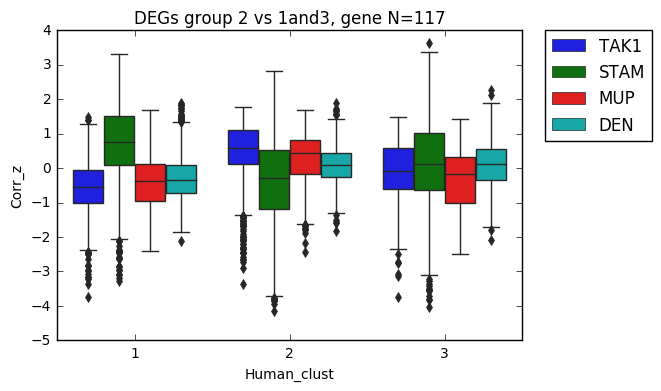

In [307]:
plot_box_corr(corrDf_g2,'DEGs group 2 vs 1and3',len(g2))

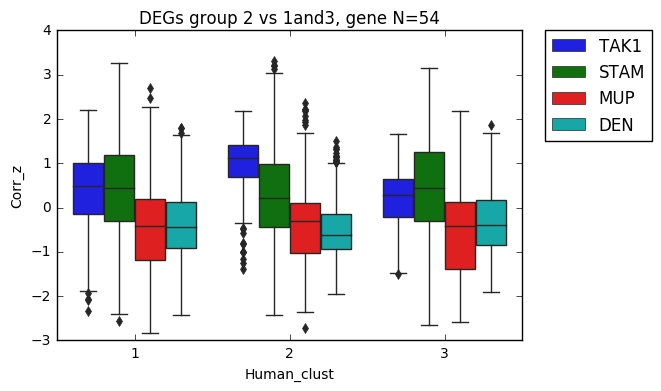

In [308]:
plot_box_corr(corrDf_g3,'DEGs group 2 vs 1and3',len(g3))